In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df=pd.read_csv("churn_prediction.csv")

In [3]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [4]:
df.shape

(28382, 21)

In [5]:
networth='customer_nw_category'
dslt='days_since_last_transaction'
pmeb='previous_month_end_balance'
ambpq='average_monthly_balance_prevQ'
ambpq2='average_monthly_balance_prevQ2'
cmc='current_month_credit'
pmc='previous_month_credit'
cmd='current_month_debit'
pmd='previous_month_debit'
cmb='current_month_balance'
pmb='previous_month_balance'
cmcd='current_month_credit/debit'
pmcd='previous_month_credit/debit'
mg='monthly_gain'
qg='quartile_gain'
cb='current_balance'
gtm='gain_this_month'
ambc='average_monthly_balance_comparison'

In [6]:
df=df.drop(['customer_id','city','branch_code'],axis=1)
df

,vintage,age,gender,dependents,occupation,customer_nw_category,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,3135,66,Male,0.0,self_employed,2,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,310,35,Male,0.0,self_employed,2,60.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,2356,31,Male,0.0,salaried,2,NaN,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,478,90,NaN,NaN,self_employed,2,147.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,2531,42,Male,2.0,self_employed,3,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,1845,10,Female,0.0,student,2,70.0,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,4919,34,Female,0.0,self_employed,2,14.0,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,297,47,Male,0.0,salaried,2,0.0,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,2585,50,Male,3.0,self_employed,3,NaN,1625.55,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0


In [7]:
df.isnull().sum()

vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
customer_nw_category                 0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [8]:
df['dependents']=df['dependents'].fillna(0)

In [9]:
#Imputing gender
for i in range(len(df)):
    if pd.isnull(df['gender'][i])==True:
        if df['occupation'][i]=='retired':
            df['gender'][i]='Male'
        elif df['occupation'][i]=='salaried':
            df['gender'][i]='Male'
        elif df['customer_nw_category'][i]==3:
            df['gender'][i]='Male'
        elif df['dependents'][i]=='More than 2 dependents':
            df['gender'][i]='Male'
        else:
            df['gender'][i]='Female'

In [10]:
#Imputing days since last transaction
mean_days=np.mean(df['days_since_last_transaction'])
for i in range(len(df)):
    if pd.isnull(df['days_since_last_transaction'][i])==True:
        if df['dependents'][i]==0:
            df['days_since_last_transaction'][i]=74
        elif df['customer_nw_category'][i]==1:
            df['days_since_last_transaction'][i]=56
        elif df['occupation'][i]=='student':
            df['days_since_last_transaction'][i]=92
        else:
            df['days_since_last_transaction'][i]=mean_days

In [11]:
df['occupation']=df['occupation'].fillna('self_employed')

In [69]:
df.isnull().sum()

vintage                               0
age                                   0
gender                                0
dependents                            0
occupation                            0
customer_nw_category                  0
days_since_last_transaction           0
current_balance                       0
previous_month_end_balance            0
average_monthly_balance_prevQ         0
average_monthly_balance_prevQ2        0
current_month_credit                  0
previous_month_credit                 0
current_month_debit                   0
previous_month_debit                  0
current_month_balance                 0
previous_month_balance                0
churn                                 0
current_month_credit/debit            0
previous_month_credit/debit           0
monthly_gain                          0
quartile_gain                         0
gain_this_month                       0
average_monthly_balance_comparison    0
dtype: int64

In [13]:
#Converting dependents and nw to object
df=df.astype({'customer_nw_category':'object'},copy=False)
df.dtypes

vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
customer_nw_category               object
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

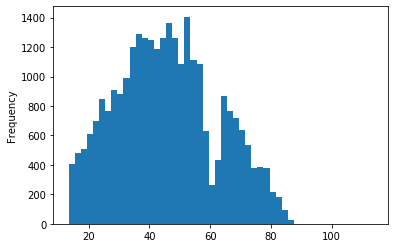

In [14]:
df['vintage']=np.sqrt(df['vintage'])
df['vintage'].plot.hist(bins=50)

# Linear Regression with no treatments

In [15]:
without_score_dict={'acc_score_train':0,'acc_score_test':0,
            'f1_score_precision_recall_train':(0,0,0,0),
           'f1_score_precision_recall_test':(0,0,0,0),
           'roc_auc_score_train':0,'roc_auc_score_test':0}

In [16]:
#Seperate dep. and indep. variables
x=df.drop(['churn'],axis=1)
y=df['churn']
x.shape,y.shape

((28382, 17), (28382,))

In [17]:
x=pd.get_dummies(x)
x

,vintage,age,dependents,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,...,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_1,customer_nw_category_2,customer_nw_category_3
0,55.991071,66,0.0,224.000000,1458.71,1458.71,1458.71,1449.07,0.20,0.20,...,0,1,0,0,0,1,0,0,1,0
1,17.606817,35,0.0,60.000000,5390.37,8704.66,7799.26,12419.41,0.56,0.56,...,0,1,0,0,0,1,0,0,1,0
2,48.538644,31,0.0,74.000000,3913.16,5815.29,4910.17,2815.94,0.61,0.61,...,0,1,0,0,1,0,0,0,1,0
3,21.863211,90,0.0,147.000000,2291.91,2291.91,2084.54,1006.54,0.47,0.47,...,1,0,0,0,0,1,0,0,1,0
4,50.309045,42,2.0,58.000000,927.72,1401.72,1643.31,1871.12,0.33,714.61,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,42.953463,10,0.0,70.000000,1076.43,1076.43,2282.19,2787.70,0.30,0.30,...,1,0,0,0,0,0,1,0,1,0
28378,70.135583,34,0.0,14.000000,3844.10,4069.21,3668.83,3865.55,1.71,2.29,...,1,0,0,0,0,1,0,0,1,0
28379,17.233688,47,0.0,0.000000,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,...,0,1,0,0,1,0,0,0,1,0
28380,50.842895,50,3.0,69.997814,1625.55,1625.55,1683.20,1857.42,0.20,0.20,...,0,1,0,0,0,1,0,0,0,1


In [18]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,vintage,age,dependents,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,...,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_1,customer_nw_category_2,customer_nw_category_3
0,0.619480,0.999147,-0.330877,1.889082,-0.139017,-0.141953,-0.144709,-0.127317,-0.044545,-0.109858,...,-0.839907,0.839907,-0.037568,-0.277108,-0.556106,0.785274,-0.279606,-0.38784,0.974396,-0.743959
1,-1.690345,-0.741756,-0.330877,-0.128143,-0.046720,0.028425,0.007249,0.118793,-0.044540,-0.109846,...,-0.839907,0.839907,-0.037568,-0.277108,-0.556106,0.785274,-0.279606,-0.38784,0.974396,-0.743959
2,0.171020,-0.966389,-0.330877,0.044059,-0.081398,-0.039514,-0.061991,-0.096652,-0.044539,-0.109844,...,-0.839907,0.839907,-0.037568,-0.277108,1.798219,-1.273441,-0.279606,-0.38784,0.974396,-0.743959
3,-1.434211,2.346943,-0.330877,0.941970,-0.119457,-0.122361,-0.129711,-0.137244,-0.044541,-0.109849,...,1.190608,-1.190608,-0.037568,-0.277108,-0.556106,0.785274,-0.279606,-0.38784,0.974396,-0.743959
4,0.277557,-0.348649,1.756001,-0.152744,-0.151482,-0.143293,-0.140285,-0.117848,-0.044543,-0.085794,...,-0.839907,0.839907,-0.037568,-0.277108,-0.556106,0.785274,-0.279606,-0.38784,-1.026277,1.344159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,-0.165076,-2.145710,-0.330877,-0.005142,-0.147991,-0.150942,-0.124974,-0.097286,-0.044543,-0.109854,...,1.190608,-1.190608,-0.037568,-0.277108,-0.556106,-1.273441,3.576459,-0.38784,0.974396,-0.743959
28378,1.470646,-0.797914,-0.330877,-0.693951,-0.083019,-0.080571,-0.091741,-0.073105,-0.044525,-0.109787,...,1.190608,-1.190608,-0.037568,-0.277108,-0.556106,0.785274,-0.279606,-0.38784,0.974396,-0.743959
28379,-1.712799,-0.067858,-0.330877,-0.866153,1.364653,1.258489,1.101198,0.332060,0.016006,0.020930,...,-0.839907,0.839907,-0.037568,-0.277108,1.798219,-1.273441,-0.279606,-0.38784,0.974396,-0.743959
28380,0.309682,0.100617,2.799440,-0.005169,-0.135100,-0.138030,-0.139329,-0.118156,-0.044545,-0.109858,...,-0.839907,0.839907,-0.037568,-0.277108,-0.556106,0.785274,-0.279606,-0.38784,-1.026277,1.344159


In [19]:
from sklearn.model_selection import train_test_split as tts
train_x,test_x,train_y,test_y=tts(x,y, random_state=90,stratify=y)
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((22705, 24), (5677, 24), (22705,), (5677,))

In [20]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=200)

In [21]:
#Train the model
lr.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
#Predict for training and test dataset
train_pred=lr.predict(train_x)
test_pred=lr.predict(test_x)

In [23]:
#Accuracy score
without_score_dict['acc_score_train']=lr.score(train_x,train_y)
without_score_dict['acc_score_test']=lr.score(test_x,test_y)
print('Train accuracy: ',lr.score(train_x,train_y),'\nTest Accuracy: ',lr.score(test_x,test_y))

Train accuracy:  0.8215371063642369 
Test Accuracy:  0.8227937290822618


In [24]:
#Checking f1_score,precision,recall
from sklearn.metrics import precision_recall_fscore_support as prfs
print('Training score:',prfs(train_y,train_pred,average='binary'))
print('Test score:',prfs(test_y,test_pred,average='binary'))
without_score_dict['f1_score_precision_recall_train']=prfs(train_y,train_pred,average='binary')
without_score_dict['f1_score_precision_recall_test']=prfs(test_y,test_pred,average='binary')

Training score: (0.7363636363636363, 0.057747148288973385, 0.10709563684442484, None)
Test score: (0.7804878048780488, 0.060836501901140684, 0.1128747795414462, None)


In [25]:
#Checking roc_auc_score
from sklearn.metrics import roc_auc_score as ras
print('Training score:',ras(train_y,train_pred))
print('Test score:',ras(test_y,test_pred))
without_score_dict['roc_auc_score_train']=ras(train_y,train_pred)
without_score_dict['roc_auc_score_test']=ras(test_y,test_pred)

Training score: 0.5265218414310737
Test score: 0.5284723050046245


# Logistic Regression with new features

In [84]:
#Adding new continuous features
df['current_month_credit/debit']=(df[cmc])/(df[cmd])
df['previous_month_credit/debit']=(df[pmc])/(df[pmd])
df['monthly_gain']=(df[cmb])-(df[pmb])
df['quartile_gain']=df[ambpq]-df[ambpq2]
df['gain_this_month']=df[cb]-df[pmeb]
df['average_monthly_balance_comparison']=(df[cmb]+3500)/(df[pmb]+5500)
df.shape

(28382, 26)

In [97]:
#Adding few more categorical variables
df['avg_quartile_balance']=(df[ambpq]+df[ambpq2])/2
df['avg_monthly_balance']=(df[cmb]+df[pmb]+df[pmeb]+df[cb])/4

In [99]:
bin=[-10000,2000,5000,10000,6000000]
label=['Dangerously Low','Low','Satisfactory','High']
df['prev_quartile_balance_category']=pd.cut(df['avg_quartile_balance'],bins=bin,labels=label)
df['prev_quartile_balance_category'].value_counts()

Low                12225
Dangerously Low     6206
Satisfactory        5870
High                4081
Name: prev_quartile_balance_category, dtype: int64

In [102]:
df['avg_monthly_balance_category']=pd.qcut(df['avg_monthly_balance'],q=4,precision=0,labels=label)
df['avg_monthly_balance_category'].value_counts()

High               7096
Dangerously Low    7096
Satisfactory       7095
Low                7095
Name: avg_monthly_balance_category, dtype: int64

In [85]:
#Now repeat the previous process

In [103]:
new_features_score_dict={'acc_score_train':0,'acc_score_test':0,
            'f1_score_precision_recall_train':(0,0,0,0),
           'f1_score_precision_recall_test':(0,0,0,0),
           'roc_auc_score_train':0,'roc_auc_score_test':0}

In [104]:
#Seperate dep. and indep. variables
x=df.drop(['churn'],axis=1)
y=df['churn']
x.shape,y.shape

((28382, 29), (28382,))

In [105]:
x=pd.get_dummies(x)
x

,vintage,age,dependents,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,...,customer_nw_category_2,customer_nw_category_3,prev_quartile_balance_category_Dangerously Low,prev_quartile_balance_category_Low,prev_quartile_balance_category_Satisfactory,prev_quartile_balance_category_High,avg_monthly_balance_category_Dangerously Low,avg_monthly_balance_category_Low,avg_monthly_balance_category_Satisfactory,avg_monthly_balance_category_High
0,55.991071,66,0.0,224.000000,1458.71,1458.71,1458.71,1449.07,0.20,0.20,...,1,0,1,0,0,0,1,0,0,0
1,17.606817,35,0.0,60.000000,5390.37,8704.66,7799.26,12419.41,0.56,0.56,...,1,0,0,0,0,1,0,0,0,1
2,48.538644,31,0.0,74.000000,3913.16,5815.29,4910.17,2815.94,0.61,0.61,...,1,0,0,1,0,0,0,0,1,0
3,21.863211,90,0.0,147.000000,2291.91,2291.91,2084.54,1006.54,0.47,0.47,...,1,0,1,0,0,0,0,1,0,0
4,50.309045,42,2.0,58.000000,927.72,1401.72,1643.31,1871.12,0.33,714.61,...,0,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,42.953463,10,0.0,70.000000,1076.43,1076.43,2282.19,2787.70,0.30,0.30,...,1,0,0,1,0,0,1,0,0,0
28378,70.135583,34,0.0,14.000000,3844.10,4069.21,3668.83,3865.55,1.71,2.29,...,1,0,0,1,0,0,0,0,1,0
28379,17.233688,47,0.0,0.000000,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,...,1,0,0,0,0,1,0,0,0,1
28380,50.842895,50,3.0,69.997814,1625.55,1625.55,1683.20,1857.42,0.20,0.20,...,0,1,1,0,0,0,1,0,0,0


In [106]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,vintage,age,dependents,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,...,customer_nw_category_2,customer_nw_category_3,prev_quartile_balance_category_Dangerously Low,prev_quartile_balance_category_Low,prev_quartile_balance_category_Satisfactory,prev_quartile_balance_category_High,avg_monthly_balance_category_Dangerously Low,avg_monthly_balance_category_Low,avg_monthly_balance_category_Satisfactory,avg_monthly_balance_category_High
0,0.619480,0.999147,-0.330877,1.889082,-0.139017,-0.141953,-0.144709,-0.127317,-0.044545,-0.109858,...,0.974396,-0.743959,1.890322,-0.869849,-0.510637,-0.409799,1.731969,-0.577323,-0.577323,-0.577377
1,-1.690345,-0.741756,-0.330877,-0.128143,-0.046720,0.028425,0.007249,0.118793,-0.044540,-0.109846,...,0.974396,-0.743959,-0.529010,-0.869849,-0.510637,2.440219,-0.577377,-0.577323,-0.577323,1.731969
2,0.171020,-0.966389,-0.330877,0.044059,-0.081398,-0.039514,-0.061991,-0.096652,-0.044539,-0.109844,...,0.974396,-0.743959,-0.529010,1.149624,-0.510637,-0.409799,-0.577377,-0.577323,1.732132,-0.577377
3,-1.434211,2.346943,-0.330877,0.941970,-0.119457,-0.122361,-0.129711,-0.137244,-0.044541,-0.109849,...,0.974396,-0.743959,1.890322,-0.869849,-0.510637,-0.409799,-0.577377,1.732132,-0.577323,-0.577377
4,0.277557,-0.348649,1.756001,-0.152744,-0.151482,-0.143293,-0.140285,-0.117848,-0.044543,-0.085794,...,-1.026277,1.344159,1.890322,-0.869849,-0.510637,-0.409799,1.731969,-0.577323,-0.577323,-0.577377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,-0.165076,-2.145710,-0.330877,-0.005142,-0.147991,-0.150942,-0.124974,-0.097286,-0.044543,-0.109854,...,0.974396,-0.743959,-0.529010,1.149624,-0.510637,-0.409799,1.731969,-0.577323,-0.577323,-0.577377
28378,1.470646,-0.797914,-0.330877,-0.693951,-0.083019,-0.080571,-0.091741,-0.073105,-0.044525,-0.109787,...,0.974396,-0.743959,-0.529010,1.149624,-0.510637,-0.409799,-0.577377,-0.577323,1.732132,-0.577377
28379,-1.712799,-0.067858,-0.330877,-0.866153,1.364653,1.258489,1.101198,0.332060,0.016006,0.020930,...,0.974396,-0.743959,-0.529010,-0.869849,-0.510637,2.440219,-0.577377,-0.577323,-0.577323,1.731969
28380,0.309682,0.100617,2.799440,-0.005169,-0.135100,-0.138030,-0.139329,-0.118156,-0.044545,-0.109858,...,-1.026277,1.344159,1.890322,-0.869849,-0.510637,-0.409799,1.731969,-0.577323,-0.577323,-0.577377


In [107]:
from sklearn.model_selection import train_test_split as tts
train_x,test_x,train_y,test_y=tts(x,y, random_state=90,stratify=y)
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((21286, 42), (7096, 42), (21286,), (7096,))

In [108]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)

In [109]:
#Train the model
lr.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [110]:
#Predict for training and test dataset
train_pred=lr.predict(train_x)
test_pred=lr.predict(test_x)

In [111]:
#Accuracy scores
new_features_score_dict['acc_score_train']=lr.score(train_x,train_y)
new_features_score_dict['acc_score_test']=lr.score(test_x,test_y)

In [112]:
#Checking f1_score,precision,recall
from sklearn.metrics import precision_recall_fscore_support as prfs
f_score_train=prfs(train_y,train_pred,average='binary')
new_features_score_dict['f1_score_precision_recall_train']=f_score_train
print('Training score:',f_score_train)
f_score_test=prfs(test_y,test_pred,average='binary')
new_features_score_dict['f1_score_precision_recall_test']=f_score_test
print('Test score:',f_score_test)

Training score: (0.7139303482587065, 0.07275031685678074, 0.13204508856682773, None)
Test score: (0.7851851851851852, 0.0806083650190114, 0.14620689655172414, None)


In [113]:
#Checking roc_auc_score
from sklearn.metrics import roc_auc_score as ras
print('Training score:',ras(train_y,train_pred))
print('Test score:',ras(test_y,test_pred))
new_features_score_dict['roc_auc_score_train']=ras(train_y,train_pred)
new_features_score_dict['roc_auc_score_test']=ras(test_y,test_pred)

Training score: 0.5330593173580945
Test score: 0.5377959659379783


In [42]:
lr.coef_

array([[-0.21465779, -0.03164992,  0.05276134, -0.18148785, -4.19024756,
        -3.80968294,  2.56583022,  1.5960578 , -0.25774744, -0.34234264,
         0.41635293,  0.3405123 ,  1.68680792,  1.45176716,  0.03124777,
        -0.04554023,  0.81221417,  1.20535023, -1.19200477, -0.61781926,
        -0.02635447,  0.02635447, -0.01072822, -0.01964936, -0.02489818,
         0.05885026, -0.04839843,  0.0122103 , -0.01300594,  0.00497878]])

In [43]:
#Creating dataframe of coefficients
c=lr.coef_.reshape(-1)
coeff=pd.DataFrame({'Variable':x.columns,'Coefficient': abs(c)})
coeff

,Variable,Coefficient
0,vintage,0.214658
1,age,0.031650
2,dependents,0.052761
3,days_since_last_transaction,0.181488
4,current_balance,4.190248
5,previous_month_end_balance,3.809683
6,average_monthly_balance_prevQ,2.565830
7,average_monthly_balance_prevQ2,1.596058
8,current_month_credit,0.257747
9,previous_month_credit,0.342343


In [44]:
sig_var=coeff[coeff['Coefficient']>0.1]
data=df[sig_var['Variable'].values]
data=pd.concat([data,df['churn']],axis=1)
data

,vintage,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,monthly_gain,quartile_gain,gain_this_month,average_monthly_balance_comparison,churn
0,55.991071,224.000000,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0.00,9.64,0.00,0.712590,0
1,17.606817,60.000000,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,-2290.83,-4620.15,-3314.29,0.699682,0
2,48.538644,74.000000,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,-63.86,2094.23,-1902.13,0.804746,0
3,21.863211,147.000000,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,622.12,1078.00,0.00,0.807821,1
4,50.309045,58.000000,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,-520.01,-227.81,-474.00,0.648885,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,42.953463,70.000000,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0.00,-505.51,0.00,0.695884,0
28378,70.135583,14.000000,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,48.22,-196.72,-225.11,0.787627,0
28379,17.233688,0.000000,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,3514.26,31519.00,4494.42,1.024011,1
28380,50.842895,69.997814,1625.55,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0.00,-174.22,0.00,0.719320,0


# Logistic Regression on siginificant variables

In [45]:
sig_features_score_dict={'acc_score_train':0,'acc_score_test':0,
            'f1_score_precision_recall_train':(0,0,0,0),
           'f1_score_precision_recall_test':(0,0,0,0),
           'roc_auc_score_train':0,'roc_auc_score_test':0}

In [46]:
#Seperate dep. and indep. variables
x=data.drop(['churn'],axis=1)
y=data['churn']
x.shape,y.shape

((28382, 16), (28382,))

In [47]:
x=pd.get_dummies(x)
x

,vintage,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,monthly_gain,quartile_gain,gain_this_month,average_monthly_balance_comparison
0,55.991071,224.000000,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0.00,9.64,0.00,0.712590
1,17.606817,60.000000,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,-2290.83,-4620.15,-3314.29,0.699682
2,48.538644,74.000000,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,-63.86,2094.23,-1902.13,0.804746
3,21.863211,147.000000,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,622.12,1078.00,0.00,0.807821
4,50.309045,58.000000,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,-520.01,-227.81,-474.00,0.648885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,42.953463,70.000000,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0.00,-505.51,0.00,0.695884
28378,70.135583,14.000000,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,48.22,-196.72,-225.11,0.787627
28379,17.233688,0.000000,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,3514.26,31519.00,4494.42,1.024011
28380,50.842895,69.997814,1625.55,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0.00,-174.22,0.00,0.719320


In [48]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,vintage,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,monthly_gain,quartile_gain,gain_this_month,average_monthly_balance_comparison
0,0.619480,1.889082,-0.139017,-0.141953,-0.144709,-0.127317,-0.044545,-0.109858,-0.070378,-0.137427,-0.142564,-0.142265,0.003846,-0.012180,0.008336,-0.189546
1,-1.690345,-0.128143,-0.046720,0.028425,0.007249,0.118793,-0.044540,-0.109846,0.035155,-0.133297,-0.022705,0.030459,-0.196188,-0.167556,-0.231453,-0.210338
2,0.171020,0.044059,-0.081398,-0.039514,-0.061991,-0.096652,-0.044539,-0.109844,0.045936,-0.126767,-0.058165,-0.057152,-0.001730,0.057779,-0.129283,-0.041112
3,-1.434211,0.941970,-0.119457,-0.122361,-0.129711,-0.137244,-0.044541,-0.109849,-0.070372,-0.049234,-0.122742,-0.137290,0.058169,0.023674,0.008336,-0.036159
4,0.277557,-0.152744,-0.151482,-0.143293,-0.140285,-0.117848,-0.044543,-0.085794,-0.059058,-0.074142,-0.149738,-0.137116,-0.041561,-0.020149,-0.025958,-0.292155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,-0.165076,-0.005142,-0.147991,-0.150942,-0.124974,-0.097286,-0.044543,-0.109854,-0.070376,-0.137423,-0.151659,-0.151274,0.003846,-0.029468,0.008336,-0.216455
28378,1.470646,-0.693951,-0.083019,-0.080571,-0.091741,-0.073105,-0.044525,-0.109787,-0.053049,-0.095705,-0.088325,-0.089671,0.008056,-0.019105,-0.007951,-0.068687
28379,-1.712799,-0.866153,1.364653,1.258489,1.101198,0.332060,0.016006,0.020930,-0.067145,-0.134480,1.275834,1.180005,0.310708,1.045277,0.333507,0.312054
28380,0.309682,-0.005169,-0.135100,-0.138030,-0.139329,-0.118156,-0.044545,-0.109858,-0.070378,-0.137427,-0.138595,-0.138333,0.003846,-0.018350,0.008336,-0.178707


In [49]:
from sklearn.model_selection import train_test_split as tts
train_x,test_x,train_y,test_y=tts(x,y, random_state=90,stratify=y)
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((21286, 16), (7096, 16), (21286,), (7096,))

In [50]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)

In [51]:
#Train the model
lr.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
#Predict for training and test dataset
train_pred=lr.predict(train_x)
test_pred=lr.predict(test_x)

In [53]:
#Accuracy scores
sig_features_score_dict['acc_score_train']=lr.score(train_x,train_y)
sig_features_score_dict['acc_score_test']=lr.score(test_x,test_y)

In [54]:
#Checking f1_score,precision,recall
from sklearn.metrics import precision_recall_fscore_support as prfs
f_score_train=prfs(train_y,train_pred,average='binary')
sig_features_score_dict['f1_score_precision_recall_train']=f_score_train
print('Training score:',f_score_train)
f_score_test=prfs(test_y,test_pred,average='binary')
sig_features_score_dict['f1_score_precision_recall_test']=f_score_test
print('Test score:',f_score_test)

Training score: (0.7211267605633803, 0.06489226869455006, 0.11906976744186047, None)
Test score: (0.8018018018018018, 0.06768060836501902, 0.12482468443197757, None)


In [55]:
#Checking roc_auc_score
from sklearn.metrics import roc_auc_score as ras
print('Training score:',ras(train_y,train_pred))
print('Test score:',ras(test_y,test_pred))
sig_features_score_dict['roc_auc_score_train']=ras(train_y,train_pred)
sig_features_score_dict['roc_auc_score_test']=ras(test_y,test_pred)

Training score: 0.5295916276867595
Test score: 0.5319375191972128
